# Micro-CT whole mouse lung segmentation

## Rosenhain, S., Magnuska, Z., Yamoah, G. et al. A preclinical micro-computed tomography database including 3D whole body organ segmentations. Sci Data 5, 180294 (2018). https://doi.org/10.1038/sdata.2018.294

Source: [Rosenhain 2018 Sci Data](https://www.nature.com/articles/sdata2018294)

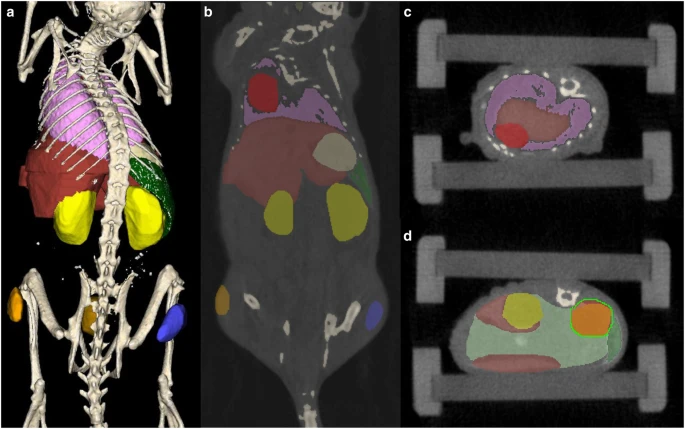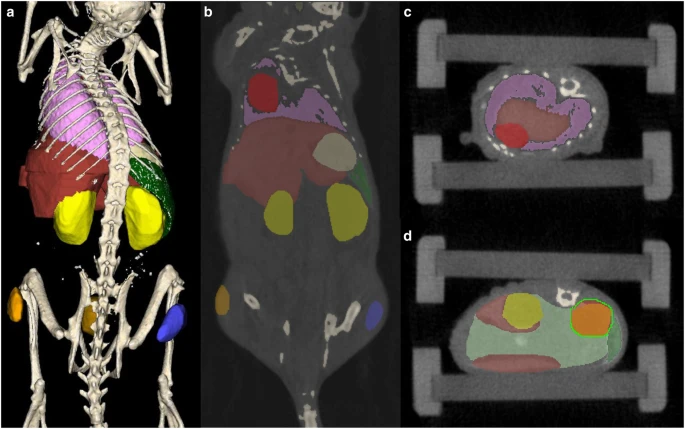

In [1]:
from fastai.vision.all import *

from preprocessing import Mouse, make_images_and_labels, make_paths

matplotlib.rc('image', cmap='gray')

In [2]:
path = Path('/research/labs/radiology/ctcic/m163524/datasets/wholebody_mouse')

In [3]:
import wget
import zipfile

if not (path/'1_nativeCTdata').exists():
    filename = wget.download('https://ndownloader.figstatic.com/files/12981293')

    with zipfile.ZipFile(dfilename, 'r') as zip_ref:
        zip_ref.extractall(directory_to_extract_to)

Some scans have 2 organ segmentations 'Organ1' and 'Organ2'

In [4]:
mice = (path/'1_nativeCTdata').ls()
mice_list = [Mouse(m) for m in mice]

In [5]:
list(mice[0].glob('*.cls'))

[Path('/research/labs/radiology/ctcic/m163524/datasets/wholebody_mouse/1_nativeCTdata/M04_024h/Organ1.cls'),
 Path('/research/labs/radiology/ctcic/m163524/datasets/wholebody_mouse/1_nativeCTdata/M04_024h/Bed.cls'),
 Path('/research/labs/radiology/ctcic/m163524/datasets/wholebody_mouse/1_nativeCTdata/M04_024h/Organ2 .cls')]

In [6]:
list(mice[0].glob('*img'))

[Path('/research/labs/radiology/ctcic/m163524/datasets/wholebody_mouse/1_nativeCTdata/M04_024h/Bed.img'),
 Path('/research/labs/radiology/ctcic/m163524/datasets/wholebody_mouse/1_nativeCTdata/M04_024h/CT140.img'),
 Path('/research/labs/radiology/ctcic/m163524/datasets/wholebody_mouse/1_nativeCTdata/M04_024h/CT280.img'),
 Path('/research/labs/radiology/ctcic/m163524/datasets/wholebody_mouse/1_nativeCTdata/M04_024h/Organ2 .img'),
 Path('/research/labs/radiology/ctcic/m163524/datasets/wholebody_mouse/1_nativeCTdata/M04_024h/Organ1.img')]

Other scans are single energy and thus lack this number

In [7]:
list(mice[1].glob('*.cls'))

[Path('/research/labs/radiology/ctcic/m163524/datasets/wholebody_mouse/1_nativeCTdata/M07_0.25h/Bed.cls'),
 Path('/research/labs/radiology/ctcic/m163524/datasets/wholebody_mouse/1_nativeCTdata/M07_0.25h/Organ.cls')]

In [8]:
list(mice[1].glob('*.img'))

[Path('/research/labs/radiology/ctcic/m163524/datasets/wholebody_mouse/1_nativeCTdata/M07_0.25h/Organ.img'),
 Path('/research/labs/radiology/ctcic/m163524/datasets/wholebody_mouse/1_nativeCTdata/M07_0.25h/Bed.img'),
 Path('/research/labs/radiology/ctcic/m163524/datasets/wholebody_mouse/1_nativeCTdata/M07_0.25h/CT140.img'),
 Path('/research/labs/radiology/ctcic/m163524/datasets/wholebody_mouse/1_nativeCTdata/M07_0.25h/CT280.img')]

next need to pick a representative class dictionary and apply convert_lbl to each mouse and save out each slice for everymouse into .pngs into a new mask directory

In [9]:
mice_list = [Mouse(m) for m in mice]

In [10]:
mice_list[0].exists()
class_dict = mice_list[0].classes()
class_dict

{'unclassified': 0,
 'Heart': 1,
 'Lung': 2,
 'Liver': 3,
 'Intestine': 4,
 'Bladder': 5,
 'Spleen': 6,
 'Muscle': 7,
 'Stomach': 8,
 'Bone': 9,
 'Kidneys': 10}

Check that `convert_lbl()` works using a mouse with a different class labeling scheme from `class_dict`. Using the *Heart* class to confirm

In [11]:
mice_list[2].classes()

{'unclassified': 0,
 'Kidneys': 1,
 'Lung': 2,
 'Heart': 3,
 'Liver': 5,
 'Intestine': 6,
 'Spleen': 7,
 'Bladder': 10}

<AxesSubplot:title={'center':'reference'}>

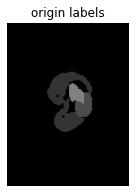

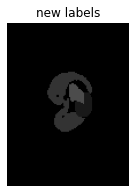

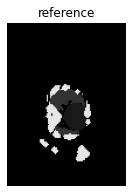

In [12]:
show_image(mice_list[2].load_lbl()[:,:,150], title='origin labels', vmin=0, vmax=10)
show_image(mice_list[2].convert_lbl(class_dict)[:,:,150], title='new labels', vmin=0, vmax=10)
show_image(mice_list[0].load_lbl()[:,:,150], title='reference', vmin=0, vmax=10)

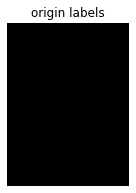

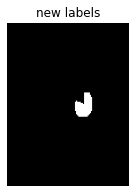

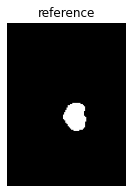

In [13]:
organ='Heart'
show_image(mice_list[2].load_lbl()[:,:,150]==class_dict[organ], title='origin labels')
show_image(mice_list[2].convert_lbl(class_dict)[:,:,150]==class_dict[organ], title='new labels')
show_image(mice_list[0].load_lbl()[:,:,150]==class_dict[organ], title='reference')
assert np.array(mice_list[2].load_lbl()[:,:,150]==class_dict[organ]).sum() == 0
assert np.array(mice_list[2].convert_lbl(class_dict)[:,:,150]==class_dict[organ]).sum() > 0

In [14]:
mice_list[0].convert_lbl(class_dict).max()

10

In [15]:
mice_list[0].img

Path('/research/labs/radiology/ctcic/m163524/datasets/wholebody_mouse/1_nativeCTdata/M04_024h/CT280.img')

<AxesSubplot:title={'center':'label'}>

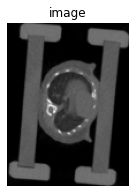

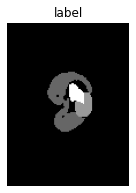

In [16]:
idx = 150
show_image(mice_list[2].load_img()[:,:,idx], title='image')
show_image(mice_list[2].load_lbl()[:,:,idx], title='label')

Let's confirm all mice are valid

In [17]:
assert len(mice_list) == 140
assert np.array([mouse.exists() for mouse in mice_list]).all()

## Now saveout masks and images into 'images' and 'labels' directories filled with pngs

copy, paste, and run the following block to delete the current images and labels files and make new ones from scratch

```python
import shutil
msk_path, img_path = make_paths()
if msk_path.exists() and img_path.exists():
    shutil.rmtree(msk_path)
    shutil.rmtree(img_path)
    
datafile, codefile = make_images_and_labels(path)
```

In [18]:
import shutil
msk_path, img_path = make_paths()
if msk_path.exists() and img_path.exists():
    shutil.rmtree(msk_path)
    shutil.rmtree(img_path)

datafile, codefile = make_images_and_labels(path)

In [19]:
codes = np.loadtxt('codes.txt', dtype=str)
df = pd.read_csv('data.csv')

In [20]:
codes

array(['unclassified', 'Heart', 'Lung', 'Liver', 'Intestine', 'Bladder',
       'Spleen', 'Muscle', 'Stomach', 'Bone', 'Kidneys'], dtype='<U12')

In [21]:
df.head()

,Unnamed: 0,Images,Masks
0,0,images/M04_024h_0.png,labels/M04_024h_0_P.png
1,1,images/M04_024h_1.png,labels/M04_024h_1_P.png
2,2,images/M04_024h_2.png,labels/M04_024h_2_P.png
3,3,images/M04_024h_3.png,labels/M04_024h_3_P.png
4,4,images/M04_024h_4.png,labels/M04_024h_4_P.png


In [22]:
assert len(df['Images']) == len(df['Masks'])

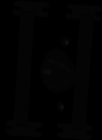

In [23]:
Image.open(df['Images'][0])

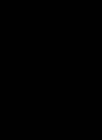

In [24]:
Image.open(df['Masks'][0])

<AxesSubplot:>

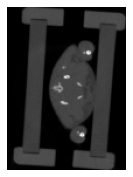

In [25]:
show_image(np.asarray(Image.open(df['Images'][10])))

# Make Fastai DataLoaders

In [26]:
def get_x(r): return Path()/r['Images']
def get_y(r): return Path()/r['Masks']
dblock = DataBlock(blocks =(ImageBlock(), MaskBlock(codes)),
                   get_x=get_x,
                   get_y=get_y,
                   splitter=RandomSplitter(seed=42),
                   item_tfms=Resize(100)
                   )
dls = SegmentationDataLoaders.from_dblock(dblock, df, bs=4)

Could not do one pass in your dataloader, there is something wrong in it


In [27]:
dls.train.one_batch()

RuntimeError: CUDA error: out of memory

In [ ]:
dblock.summary(df)

In [ ]:
dls = SegmentationDataLoaders.from_dblock(dblock, df, bs=4)

In [ ]:
len(dls.train), len(dls.valid)

In [ ]:
dls.train.show_batch(max_n=6)